<img src="./files/universidad-nebrija.jpg" alt="Logo Nebrija" align="right" width=200>


<h2><font color="#004D7F" size=4>Lenguajes de Programación</font></h2>

<h1><font color="#004D7F" size=5>Algoritmo de Grover</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>José Javier Paulet González</font><br>
<font color="#004D7F" size=3>29/02/2024</font><br>
<font color="#004D7F" size=3>Universidad Antonio de Nebrija</font>

</div>
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $

---

<h1><font color="#004D7F" size=15>Algoritmo Grover</font></h1>

 - Se trata de un algoritmo de búsqueda.

 - Los algoritmos clásicos tienen que evaluar todas las entradas en el peor de los casos.

 - El algoritmo de Grover es un algoritmo cuántico que evalúa funciones con N posibles entradas encontrando el elemento ω para el cual la función toma el valor de 1 en tiempo $O(\sqrt(N))$.


<h1><font color="#003D7F" size=5>Pasos del algoritmo</font></h1>

1. Consiste en generar una superposición de todos los estados posibles de entrada para posteriormente aplicar $\frac{\pi\sqrt{\frac{N}{k}}}{4}$ iteraciones de Grover, donde $N=2^n$ es el número total de estados, $n$ el número de qubits de entrada y $k$ el número de soluciones.

Una iteración de Grover se compone de dos partes: 

2. La aplicación del operador Oráculo.
3. La aplicación del operador Inversión sobre la media.
<img src="./files/esquema-grover-xh-sin-uncomputation.png" alt="Circuito Grover" align="center">

<h1><font color="#003D7F" size=2>Ejercicio</font></h1>
Encontrar el elemento (k=1) que satisface la siguiente función:
$f(x_{2},x_{1},x_{0})=(x_{2}\vee\overline{x_{1}})\wedge(\overline{x_{2}}\vee\overline{x_{0}})\wedge x_{0}$

Leyes de De Morgan:
\begin{gather}
    \overline{\left(p\wedge q\right)}\longleftrightarrow\overline{\left(p\right)}\vee\overline{\left(q\right)}\nonumber
   \\\nonumber
   \overline{\left(p\vee q\right)}\longleftrightarrow\overline{\left(p\right)}\wedge\overline{\left(q\right)}
\end{gather}

$f(x_{2},x_{1},x_{0})=(x_{2}\vee\overline{x_{1}})\wedge(\overline{x_{2}}\vee\overline{x_{0}})\wedge x_{0}$

$\overline{\overline{f(x_{2},x_{1},x_{0})}}=\overline{\overline{(x_{2}\vee\overline{x_{1}})\wedge(\overline{x_{2}}\vee\overline{x_{0}})\wedge x_{0}}}$

...

¿Cuántos Qubits son necesarios para el operador cuántico que representa $f(x_{2},x_{1},x_{0})$?

La función es:
<h1 style="text-align: center">
$f:  B^{3} \longrightarrow B^{1}$
</h1>

<h1 style="text-align: center">
$x_{2},x_{1},x_{0} \leadsto f(x_{2},x_{1},x_{0})$
</h1>

Por lo tanto...

El número de iteraciones es:  2


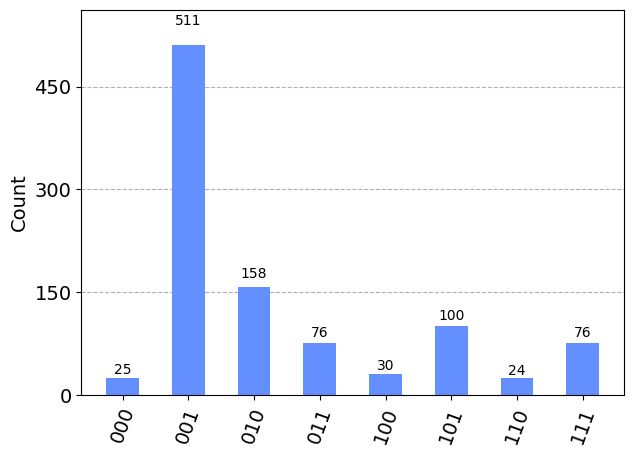

In [30]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import MCMT
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#Calculamos los qubits que vamos a necesitar
n_qubits = 6

#Creamos el operador oráculo
oracle_registry = QuantumRegister(n_qubits)
oracle_circ = QuantumCircuit(oracle_registry, name='Oracle')

#Cláusula 1
oracle_circ.x(oracle_registry[5])
oracle_circ.ccx(oracle_registry[5], oracle_registry[4], oracle_registry[2])
oracle_circ.x(oracle_registry[5])
oracle_circ.x(oracle_registry[2])
oracle_circ.barrier()

#Cláusula 2
oracle_circ.ccx(oracle_registry[5], oracle_registry[3], oracle_registry[1])
oracle_circ.x(oracle_registry[1])
oracle_circ.barrier()

#Conjunción de todas las cláusulas
oracle_circ.mcx(oracle_registry[1:4], oracle_registry[0])
oracle_circ.barrier()

#Creación del operador Inversión sobre la media
ism_registry = QuantumRegister(3)
ism_circ = QuantumCircuit(ism_registry, name='ISM')
ism_circ.h(ism_registry)
ism_circ.x(ism_registry)
ism_circ.append(MCMT('z', num_ctrl_qubits=2, num_target_qubits=1), [2, 1, 0])
ism_circ.x(ism_registry)
ism_circ.h(ism_registry)


#Mostramos los circuitos

#display(oracle_circ.draw(output='mpl', reverse_bits=True))
#display(ism_circ.decompose(gates_to_decompose=["mcmt"]).draw(output='mpl', reverse_bits=True))

#Creamos el circuito de Grover
    
grover_registry = QuantumRegister(n_qubits)
result_registry = ClassicalRegister(3)
grover_circ = QuantumCircuit(grover_registry, result_registry, name='Grover')

grover_circ.x(grover_registry[0])
grover_circ.barrier()
grover_circ.h(grover_registry[5])
grover_circ.h(grover_registry[4])
grover_circ.h(grover_registry[3])
grover_circ.h(grover_registry[0])

N = 2**3
k = 1
iterations = int(round((np.pi * np.sqrt(N/k) / 4)))
print("El número de iteraciones es: ", iterations)
for i in range(iterations):
    grover_circ.append(oracle_circ, [j for j in range(n_qubits)])
    grover_circ.append(ism_circ, [3, 4, 5])


#Mediciones
grover_circ.measure(grover_registry[3], result_registry[0])
grover_circ.measure(grover_registry[4], result_registry[1])
grover_circ.measure(grover_registry[5], result_registry[2])

#Mostramos el circuito
#display(grover_circ.draw(output='mpl', reverse_bits=True))

#Lanzamos las ejecuciones y obtenemos los resultados
job = execute(grover_circ, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(grover_circ)

plot_histogram(counts)

### Uncomputation trick

Esta técnica se utiliza descomputar los resultados intermedios de los registros de trabajo para que no interfieran negativamente en el resultado final del algoritmo:
 - Si no lo hacemos, después de la primera aplicación del **Oráculo** de la primera iteración el resultado de los qubits de trabajo es $w_{i}\oplus g_{i}(x)$. Si inicializamos $w_{i}$ a **0** tenemos como resultado en el qubit $g_{i}(x)$ que es lo que queremos. Sin embargo, para la siguiente aplicación del **Oráculo** (iteración 2 del algoritmo), tenemos en el qubit el resultado $g_{i}(x)$ y si aplicamos nuevamente el **Oráculo** nos quedaría en el qubit **i** de trabajo el resultado $g_{i}(x)\oplus g_{i}(x)$ que no es el resultado que queremos obtener en dicho qubit. En sucesivas iteraciones ocurrirá lo mismo.

 - Otra de las consecuencias de no descomputar los resultados intermedios es que no se produzca la interferencia cuántica como deseamos (constructiva y destructiva). Vamos a poner un ejemplo para verlo mejor. Imaginamos que el resultado de aplicar una **iteración de Grover (Oráculo + Inversión sobre la media)** obtenemos de resultado el siguiente estado: 
 
\begin{gather}
    \frac{\ket{x_0}\ket{g_0}\ket{f(x_0)}+\ket{x_1}\ket{g_0}\ket{f(x_0)}+\ket{x_0}\ket{g_1}\ket{f(x_1)}-\ket{x_1}\ket{g_1}\ket{f(x_1)}}{2}
\end{gather}

Como se observa en el ejemplo, si $f(x_0)=f(x_1)$ y $g_{0}(x)=g_{1}(x)$ entonces gracias a la interferencia cuántica se cancelaría $\ket{x_1}$. Sin embargo, si los residuos generados por la computación de $f(x_0)$ y $f(x_1)$ son diferentes y los resultados de $f(x_0)$ y $f(x_1)$ son iguales, no se cancelan, a pesar de que sí se deberían cancelar. Por este motivo vamos a descomputarlo para que todas las $g_{i}(x)$ sean **0** y no perjudiquen el proceso de interferencia.

El circuito resultante tras aplicar el **Uncomputation trick** sería:
<img src="./files/esquema-grover-xh-uncompu-g.png" alt="Circuito Grover" align="center">

Para llevar esto a cabo, únicamente es necesario aplicar las inversas de puertas que computan las $g_{i}(x)$ en orden inverso. Debido a que las puertas que utilizamos son sus propias inversas, solo tenemos que aplicarlas en orden inverso.

El número de iteraciones es:  2


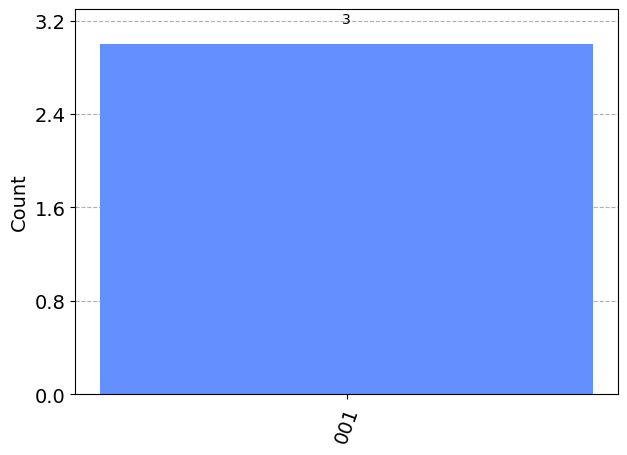

In [33]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
from qiskit.visualization import plot_histogram

#Calculamos los qubits que vamos a necesitar
n_qubits = 6

#Creamos el operador oráculo en orden inverso
oracle_inv_registry = QuantumRegister(n_qubits)
oracle_inv_circ = QuantumCircuit(oracle_inv_registry, name="Uncomputation")

#Cláusula 2
oracle_inv_circ.x(oracle_inv_registry[1])
oracle_inv_circ.ccx(oracle_inv_registry[5], oracle_inv_registry[3], oracle_inv_registry[1])
oracle_inv_circ.barrier()

#Cláusula 1
oracle_inv_circ.x(oracle_inv_registry[2])
oracle_inv_circ.x(oracle_inv_registry[5])
oracle_inv_circ.ccx(oracle_inv_registry[5], oracle_inv_registry[4], oracle_inv_registry[2])
oracle_inv_circ.x(oracle_inv_registry[5])

#Mostramos el circuito
#display(oracle_inv_circ.draw(output='mpl', reverse_bits=True))

#Creamos el circuito de Grover
    
grover_registry = QuantumRegister(n_qubits)
result_registry = ClassicalRegister(3)
grover_circ = QuantumCircuit(grover_registry, result_registry, name='Grover')

grover_circ.x(grover_registry[0])
grover_circ.barrier()
grover_circ.h(grover_registry[5])
grover_circ.h(grover_registry[4])
grover_circ.h(grover_registry[3])
grover_circ.h(grover_registry[0])

N = 2**3
k = 1
iterations = int(round((np.pi * np.sqrt(N/k) / 4)))
print("El número de iteraciones es: ", iterations)
for i in range(iterations):
    grover_circ.append(oracle_circ, [j for j in range(n_qubits)])
    grover_circ.append(oracle_inv_circ, [j for j in range(n_qubits)])
    grover_circ.append(ism_circ, [3, 4, 5])


#Mediciones
grover_circ.measure(grover_registry[3], result_registry[0])
grover_circ.measure(grover_registry[4], result_registry[1])
grover_circ.measure(grover_registry[5], result_registry[2])

#Mostramos el circuito
#display(grover_circ.draw(output='mpl', reverse_bits=True))

#Lanzamos las ejecuciones y obtenemos los resultados
job = execute(grover_circ, Aer.get_backend('qasm_simulator'), shots=3)
counts = job.result().get_counts(grover_circ)

plot_histogram(counts)


<h1><font color="#003D7F" size=2>Ejercicio</font></h1>

Encontrar el elemento que satisface la siguiente función (Oráculo construido en la sesión de **Implementación de oráculos**):

\begin{equation}
f(x_{2},x_{1},x_{0})=\overline{(\overline{x_{2}}\wedge \overline{x_{0}})}\wedge\overline{(x_{2}\wedge x_{1}\wedge x_{0})}\wedge\overline{(\overline{x_{2}}\wedge x_{0})}\wedge\overline{(x_{2}\wedge\overline{x_{1}})}
\end{equation}

¿Cuántos qubits serán necesarios? 8 qubits serán necesarios.
 - Uno por variable (3)
 - Uno por cláusula (4)
 - Uno para el resultado final (1)

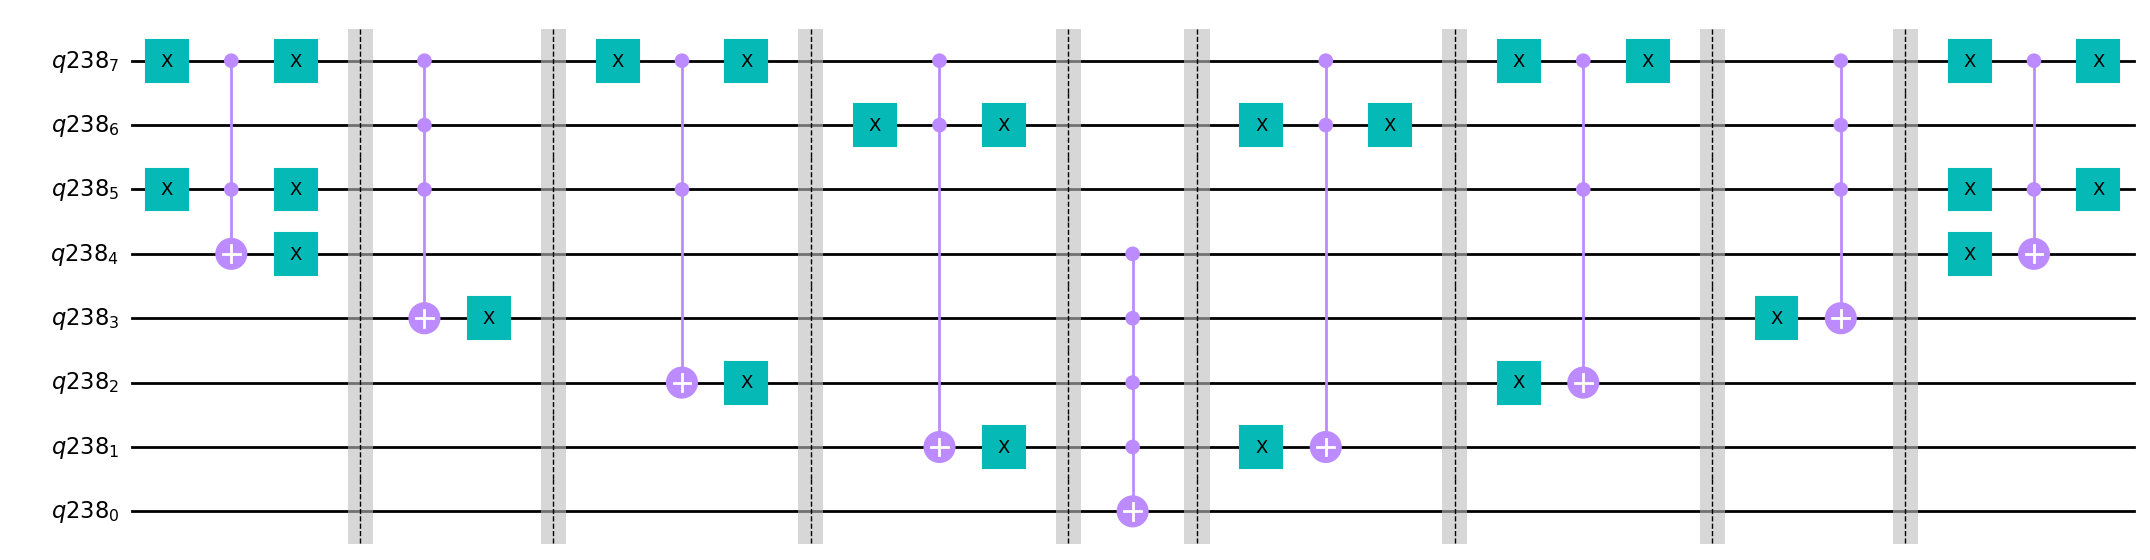

El número de iteraciones es:  2


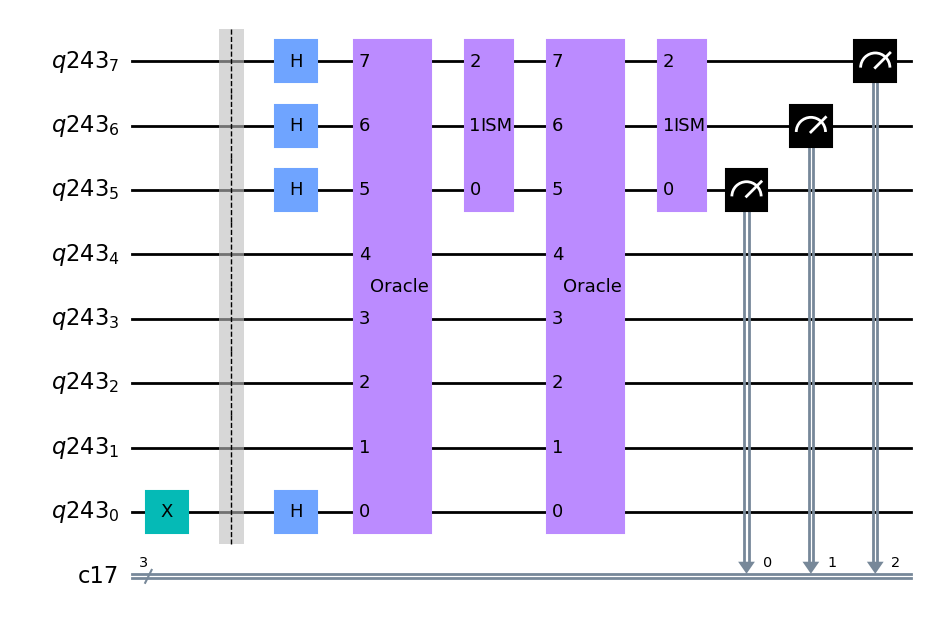

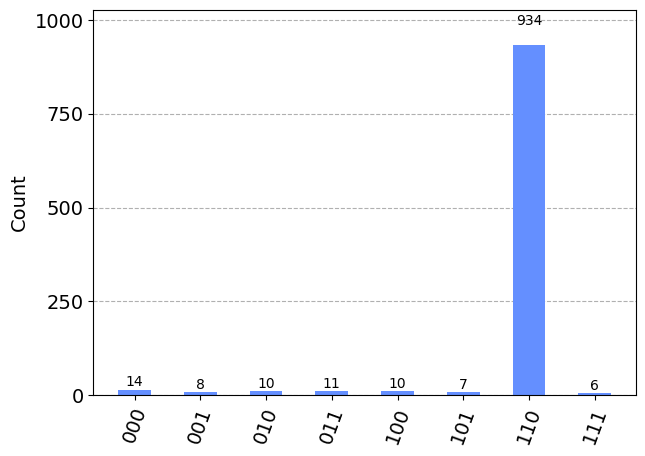

In [46]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
from qiskit.visualization import plot_histogram

#Calculamos los qubits que vamos a necesitar
n_qubits = 8

#Creamos el operador oráculo
u_f_registry = QuantumRegister(n_qubits)
u_f_circ = QuantumCircuit(u_f_registry, name="Oracle")

#Oracle
#Clause 1
u_f_circ.x(7)
u_f_circ.x(5)
u_f_circ.ccx(7, 5, 4)
u_f_circ.x(4)
u_f_circ.x(5)
u_f_circ.x(7)
u_f_circ.barrier()

#Clause 2
u_f_circ.mcx([7, 6, 5], 3)
u_f_circ.x(3)
u_f_circ.barrier()
#Clause 3
u_f_circ.x(7)
u_f_circ.ccx(7, 5, 2)
u_f_circ.x(2)
u_f_circ.x(7)
u_f_circ.barrier()
#Clause 4
u_f_circ.x(6)
u_f_circ.ccx(7, 6, 1)
u_f_circ.x(1)
u_f_circ.x(6)
u_f_circ.barrier()

#Conjunción final
u_f_circ.mcx([4, 3, 2, 1], 0)

#Descomputamos la cláusula 4
u_f_circ.barrier()
u_f_circ.x(6)
u_f_circ.x(1)
u_f_circ.ccx(7, 6, 1)
u_f_circ.x(6)
#Descomputamos la cláusula 3
u_f_circ.barrier()
u_f_circ.x(7)
u_f_circ.x(2)
u_f_circ.ccx(7, 5, 2)
u_f_circ.x(7)
#Descomputamos la cláusula 2
u_f_circ.barrier()
u_f_circ.x(3)
u_f_circ.mcx([7, 6, 5], 3)
#Descomputamos la cláusula 1
u_f_circ.barrier()
u_f_circ.x(7)
u_f_circ.x(5)
u_f_circ.x(4)
u_f_circ.ccx(7, 5, 4)
u_f_circ.x(5)
u_f_circ.x(7)


display(u_f_circ.draw(output='mpl', fold=80, reverse_bits=True))


ism_registry = QuantumRegister(3)
ism_circ = QuantumCircuit(ism_registry, name='ISM')
ism_circ.h(ism_registry)
ism_circ.x(ism_registry)
ism_circ.append(MCMT('z', num_ctrl_qubits=2, num_target_qubits=1), [2, 1, 0])
ism_circ.x(ism_registry)
ism_circ.h(ism_registry)



grover_registry = QuantumRegister(n_qubits)
result_registry = ClassicalRegister(3)
grover_circ = QuantumCircuit(grover_registry, result_registry, name='Grover')

grover_circ.x(grover_registry[0])
grover_circ.barrier()
grover_circ.h(grover_registry[5])
grover_circ.h(grover_registry[6])
grover_circ.h(grover_registry[7])
grover_circ.h(grover_registry[0])

N = 2**3
k = 1
iterations = int(round((np.pi * np.sqrt(N/k) / 4)))
print("El número de iteraciones es: ", iterations)
for i in range(iterations):
    grover_circ.append(u_f_circ, [j for j in range(n_qubits)])
    grover_circ.append(ism_circ, [5, 6, 7])


#Mediciones
grover_circ.measure(grover_registry[5], result_registry[0])
grover_circ.measure(grover_registry[6], result_registry[1])
grover_circ.measure(grover_registry[7], result_registry[2])

#Mostramos el circuito
display(grover_circ.draw(output='mpl', reverse_bits=True))

#Lanzamos las ejecuciones y obtenemos los resultados
job = execute(grover_circ, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(grover_circ)

plot_histogram(counts)

### Forma rápida de hacer el _Uncomputation trick_

Podemos usar el método de los circuitos cuánticos **.reverse_ops()** que nos devuelve el circuito cuántico pero con sus operaciones en orden inverso.

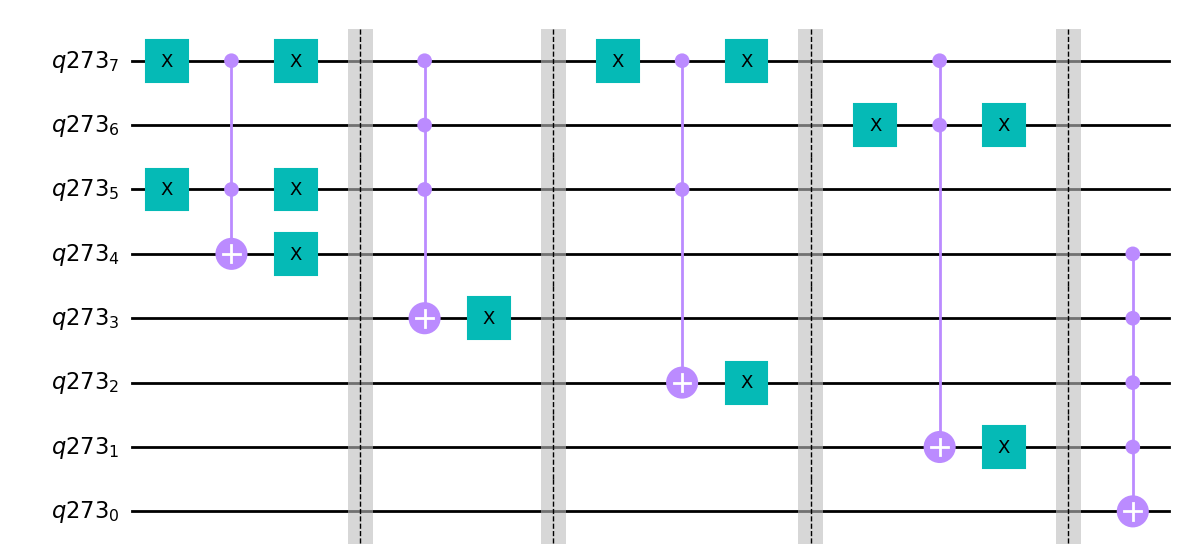

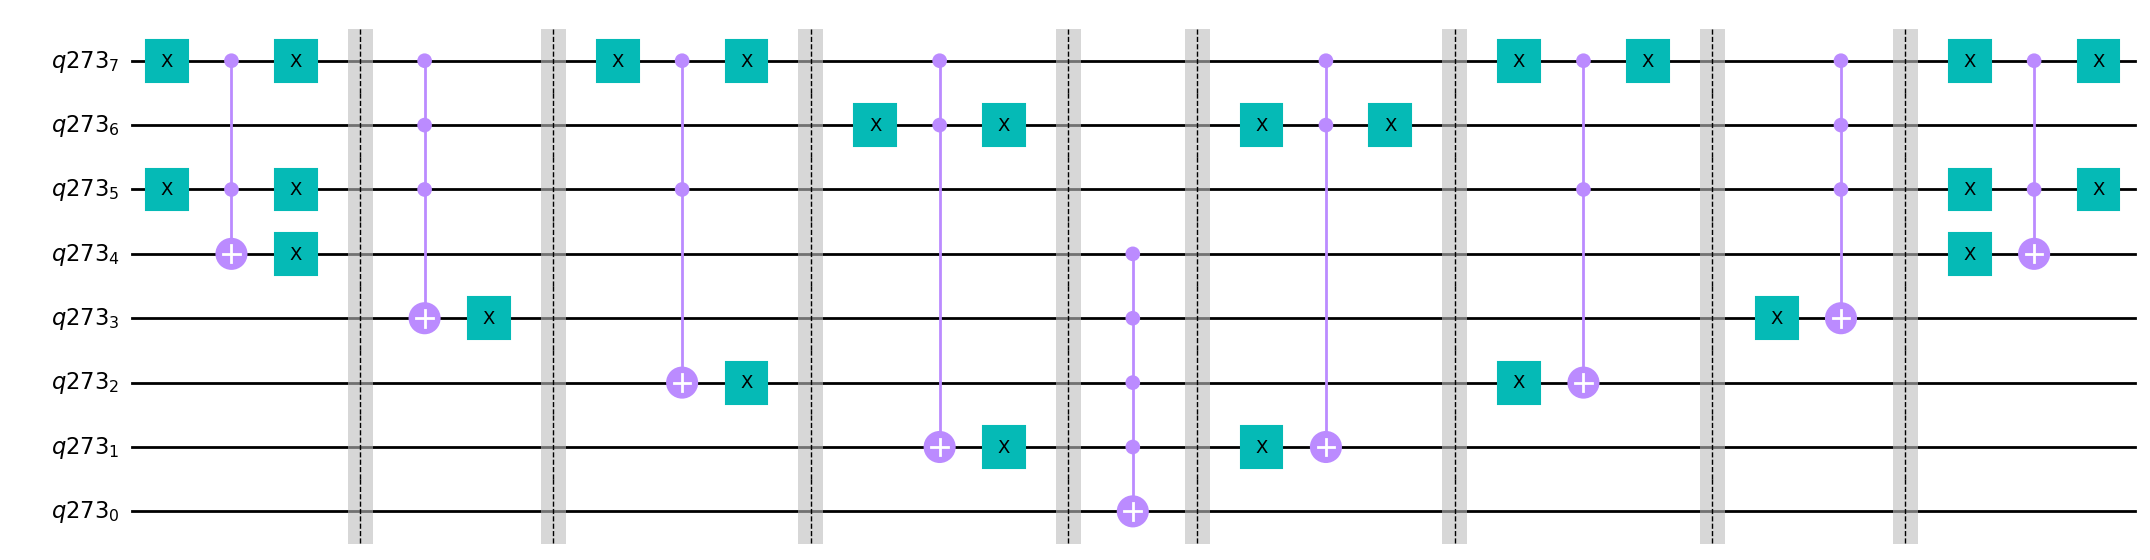

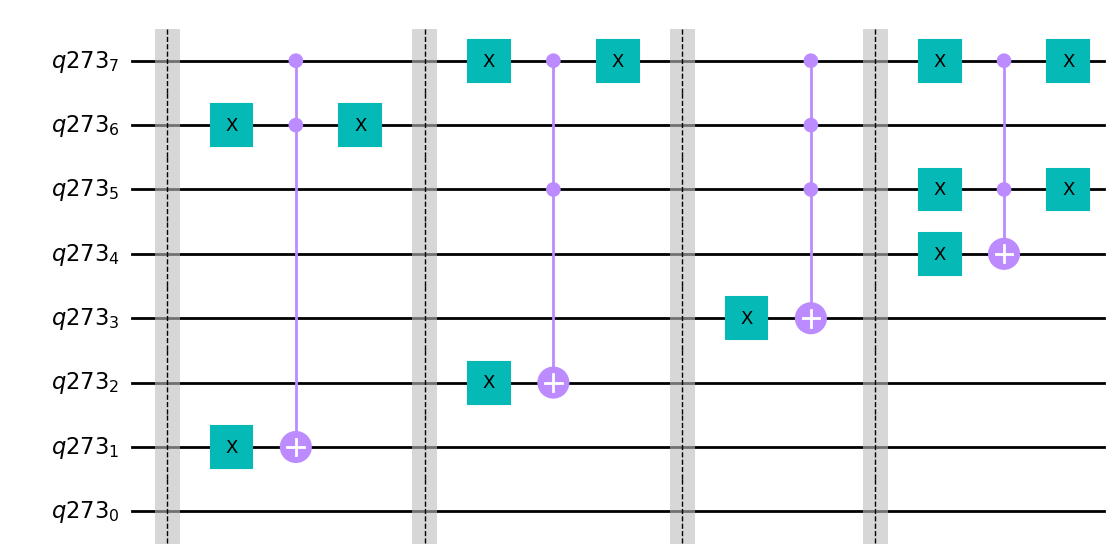

El número de iteraciones es:  2


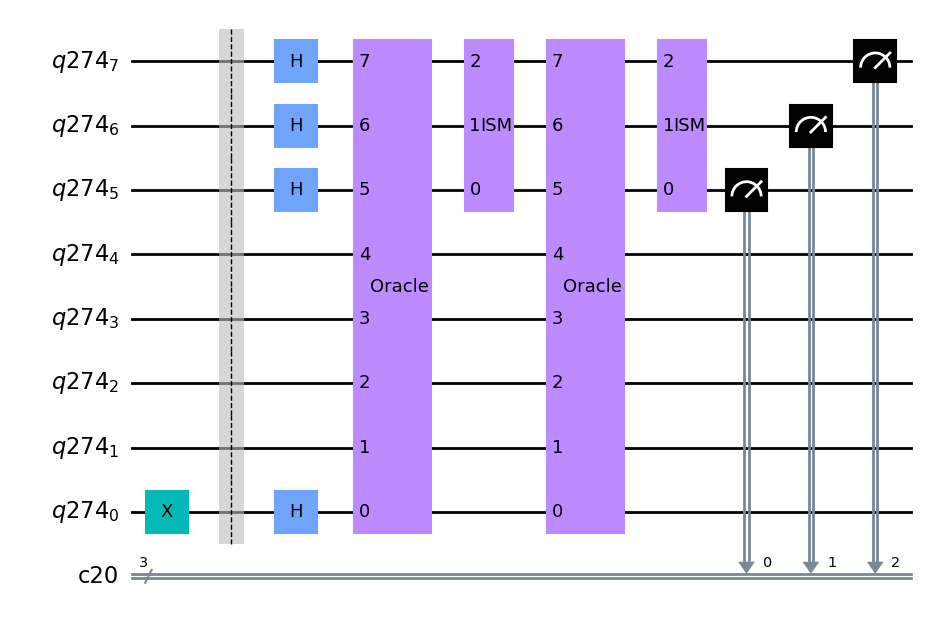

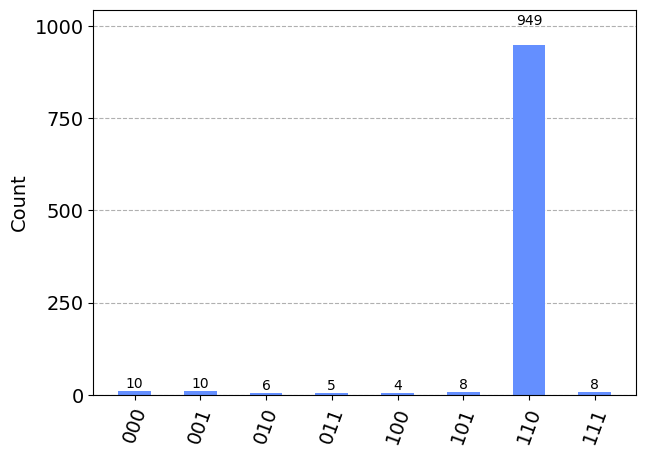

In [51]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute, ClassicalRegister
from qiskit.visualization import plot_histogram

n_qubits = 8

#Creamos el operador oráculo
u_f_registry = QuantumRegister(n_qubits)
u_f_circ = QuantumCircuit(u_f_registry, name="Oracle")

#Oracle
#Clause 1
u_f_circ.x(7)
u_f_circ.x(5)
u_f_circ.ccx(7, 5, 4)
u_f_circ.x(4)
u_f_circ.x(5)
u_f_circ.x(7)
u_f_circ.barrier()

#Clause 2
u_f_circ.mcx([7, 6, 5], 3)
u_f_circ.x(3)
u_f_circ.barrier()
#Clause 3
u_f_circ.x(7)
u_f_circ.ccx(7, 5, 2)
u_f_circ.x(2)
u_f_circ.x(7)
u_f_circ.barrier()
#Clause 4
u_f_circ.x(6)
u_f_circ.ccx(7, 6, 1)
u_f_circ.x(1)
u_f_circ.x(6)
u_f_circ.barrier()

u_f_uncomputation_circ = u_f_circ.reverse_ops()

#Conjunción final
u_f_circ.mcx([4, 3, 2, 1], 0)

display(u_f_circ.draw(output='mpl', fold=80, reverse_bits=True))

u_f_circ.append(u_f_uncomputation_circ, [i for i in range(n_qubits)])

display(u_f_circ.decompose(gates_to_decompose=["Oracle_reverse"]).draw(output='mpl', fold=80, reverse_bits=True))
display(u_f_uncomputation_circ.draw(output='mpl', fold=80, reverse_bits=True))

grover_registry = QuantumRegister(n_qubits)
result_registry = ClassicalRegister(3)
grover_circ = QuantumCircuit(grover_registry, result_registry, name='Grover')

grover_circ.x(grover_registry[0])
grover_circ.barrier()
grover_circ.h(grover_registry[5])
grover_circ.h(grover_registry[6])
grover_circ.h(grover_registry[7])
grover_circ.h(grover_registry[0])

N = 2**3
k = 1
iterations = int(round((np.pi * np.sqrt(N/k) / 4)))
print("El número de iteraciones es: ", iterations)
for i in range(iterations):
    grover_circ.append(u_f_circ, [j for j in range(n_qubits)])
    grover_circ.append(ism_circ, [5, 6, 7])


#Mediciones
grover_circ.measure(grover_registry[5], result_registry[0])
grover_circ.measure(grover_registry[6], result_registry[1])
grover_circ.measure(grover_registry[7], result_registry[2])

#Mostramos el circuito
display(grover_circ.draw(output='mpl', reverse_bits=True))

#Lanzamos las ejecuciones y obtenemos los resultados
job = execute(grover_circ, Aer.get_backend('qasm_simulator'), shots=1000)
counts = job.result().get_counts(grover_circ)

plot_histogram(counts)